In [1]:
import sys
import os
from pathlib import Path
from glob import glob


In [2]:
sys.path.append('..')

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [4]:
from experiments.eval_features import eval_features

In [5]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
PATH_RESULTS = os.path.join(PATH_ROOT, 'results', 'exp643896')
PATH_OUTPUT = os.path.join(PATH_RESULTS, 'tuning')
if not os.path.exists(PATH_OUTPUT):
    os.makedirs(PATH_OUTPUT)

print(PATH_RESULTS)

/home/lukec/workspace/baard_v4/results/exp643896


In [6]:
def get_auc_df(output_filename, detector_name, data_name, attack_name, eps):
    _detector_name = detector_name.split('_')[0]
    path_files = glob(os.path.join(
        PATH_RESULTS,
        data_name,
        detector_name,
        attack_name,
        f'{_detector_name}-*-{data_name}-{attack_name}-{eps}.pt'
    ))
    print(path_files[0])

    k_list = sorted([int(Path(f).stem.split('-')[1]) for f in path_files])
    print(len(k_list))

    files_adv = [f'{_detector_name}-{k}-{data_name}-{attack_name}-{eps}.pt' for k in k_list]
    files_clean = [f'{_detector_name}-{k}-{data_name}-{attack_name}-clean.pt' for k in k_list]

    path_input = os.path.join(PATH_RESULTS, data_name, detector_name, attack_name)

    df = pd.DataFrame()
    for file_clean, file_adv in zip(files_clean, files_adv):
        _, df_auc_tpr = eval_features(path_input, os.path.join(PATH_RESULTS, 'roc'), file_clean, file_adv)
        df = pd.concat([df, df_auc_tpr], ignore_index=True)
    df['k'] = k_list

    df.to_csv(os.path.join(PATH_OUTPUT, output_filename))
    return df


/home/lukec/workspace/baard_v4/results/exp643896/MNIST/ReliabilityStage_tuneK/APGD-2/ReliabilityStage-75-MNIST-APGD-2-4.0.pt
38
/home/lukec/workspace/baard_v4/results/exp643896/MNIST/ReliabilityStage_tuneK/APGD-inf/ReliabilityStage-70-MNIST-APGD-inf-0.22.pt
38
/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/ReliabilityStage_tuneK/APGD-2/ReliabilityStage-95-CIFAR10-APGD-2-0.3.pt
38
/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/ReliabilityStage_tuneK/APGD-inf/ReliabilityStage-55-CIFAR10-APGD-inf-0.01.pt
38


<AxesSubplot:xlabel='k', ylabel='auc'>

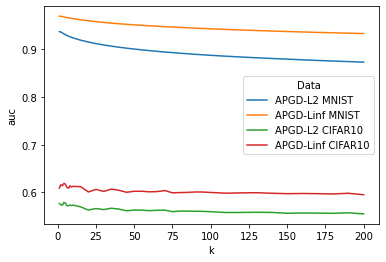

In [7]:
df_mnist_l2 = get_auc_df(
    'param_tuning_k_s2_mnist_l2.csv', 
    'ReliabilityStage_tuneK', 
    'MNIST', 
    'APGD-2', 
    '4.0'
)
df_mnist_linf = get_auc_df(
    'param_tuning_k_s2_mnist_linf.csv', 
    'ReliabilityStage_tuneK', 
    'MNIST', 
    'APGD-inf', 
    '0.22'
)
df_cifar10_l2 = get_auc_df(
    'param_tuning_k_s2_cifar10_l2.csv',
    'ReliabilityStage_tuneK',
    'CIFAR10',
    'APGD-2',
    '0.3',
)
df_cifar10_linf = get_auc_df(
    'param_tuning_k_s2_cifar10_linf.csv',
    'ReliabilityStage_tuneK',
    'CIFAR10',
    'APGD-inf',
    '0.01',
)
df_mnist_l2['Data'] = 'APGD-L2 MNIST'
df_mnist_linf['Data'] = 'APGD-Linf MNIST'
df_cifar10_l2['Data'] = 'APGD-L2 CIFAR10'
df_cifar10_linf['Data'] = 'APGD-Linf CIFAR10'

df1 = pd.concat(
    [df_mnist_l2, df_mnist_linf, df_cifar10_l2, df_cifar10_linf], 
    ignore_index=True)
df1 = df1[['k', 'Data', 'auc']]

sn.lineplot(data=df1, x='k', y='auc', hue='Data')

## Get results for Stage 3

In [8]:
def get_auc_df(output_filename, detector_name, data_name, attack_name, eps):
    _detector_name = detector_name.split('_')[0]
    path_files = glob(os.path.join(
        PATH_RESULTS,
        data_name,
        detector_name,
        attack_name,
        f'{_detector_name}-*-{data_name}-{attack_name}-{eps}.pt'
    ))
    print(path_files[0])

    k_list = sorted([int(Path(f).stem.split('-')[1]) for f in path_files])
    k_list = k_list[5:]
    print(len(k_list))

    files_adv = [f'{_detector_name}-{k}-{data_name}-{attack_name}-{eps}.pt' for k in k_list]
    files_clean = [f'{_detector_name}-{k}-{data_name}-{attack_name}-clean.pt' for k in k_list]

    path_input = os.path.join(PATH_RESULTS, data_name, detector_name, attack_name)

    df = pd.DataFrame()
    for file_clean, file_adv in zip(files_clean, files_adv):
        _, df_auc_tpr = eval_features(path_input, os.path.join(PATH_RESULTS, 'roc'), file_clean, file_adv)
        df = pd.concat([df, df_auc_tpr], ignore_index=True)
    df['k'] = k_list

    df.to_csv(os.path.join(PATH_OUTPUT, output_filename))
    return df

/home/lukec/workspace/baard_v4/results/exp643896/MNIST/DecidabilityStage_tuneK/APGD-2/DecidabilityStage-150-MNIST-APGD-2-4.0.pt
33
/home/lukec/workspace/baard_v4/results/exp643896/MNIST/DecidabilityStage_tuneK/APGD-inf/DecidabilityStage-40-MNIST-APGD-inf-0.22.pt
33
/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/DecidabilityStage_tuneK/APGD-2/DecidabilityStage-10-CIFAR10-APGD-2-0.3.pt
33
/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/DecidabilityStage_tuneK/APGD-inf/DecidabilityStage-50-CIFAR10-APGD-inf-0.01.pt
33


<AxesSubplot:xlabel='k', ylabel='auc'>

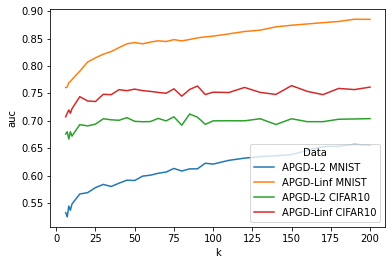

In [9]:
df_s3_mnist_l2 = get_auc_df(
    'param_tuning_k_s3_mnist_l2.csv', 
    'DecidabilityStage_tuneK', 
    'MNIST', 
    'APGD-2', 
    '4.0'
)
df_s3_mnist_linf = get_auc_df(
    'param_tuning_k_s3_mnist_linf.csv', 
    'DecidabilityStage_tuneK', 
    'MNIST', 
    'APGD-inf', 
    '0.22'
)
df_s3_cifar10_l2 = get_auc_df(
    'param_tuning_k_s3_cifar10_l2.csv',
    'DecidabilityStage_tuneK',
    'CIFAR10',
    'APGD-2',
    '0.3',
)
df_s3_cifar10_linf = get_auc_df(
    'param_tuning_k_s3_cifar10_linf.csv',
    'DecidabilityStage_tuneK',
    'CIFAR10',
    'APGD-inf',
    '0.01',
)

df_s3_mnist_l2['Data'] = 'APGD-L2 MNIST'
df_s3_mnist_linf['Data'] = 'APGD-Linf MNIST'
df_s3_cifar10_l2['Data'] = 'APGD-L2 CIFAR10'
df_s3_cifar10_linf['Data'] = 'APGD-Linf CIFAR10'

df2 = pd.concat(
    [df_s3_mnist_l2, df_s3_mnist_linf, df_s3_cifar10_l2, df_s3_cifar10_linf], 
    ignore_index=True)
df2 = df2[['k', 'Data', 'auc']]

sn.lineplot(data=df2, x='k', y='auc', hue='Data')

## Get DataFrame for scale

In [10]:
def get_auc_df(output_filename, detector_name, data_name, attack_name, eps):
    _detector_name = detector_name.split('_')[0]
    path_files = glob(os.path.join(
        PATH_RESULTS,
        data_name,
        detector_name,
        attack_name,
        f'{_detector_name}-*-{data_name}-{attack_name}-{eps}.pt'
    ))
    print(path_files[0])

    scale_list = sorted([float(Path(f).stem.split('-')[1]) for f in path_files])
    print(len(scale_list))

    files_adv = [f'{_detector_name}-{scale}-{data_name}-{attack_name}-{eps}.pt' for scale in scale_list]
    files_clean = [f'{_detector_name}-{scale}-{data_name}-{attack_name}-clean.pt' for scale in scale_list]

    path_input = os.path.join(PATH_RESULTS, data_name, detector_name, attack_name)

    df = pd.DataFrame()
    for file_clean, file_adv in zip(files_clean, files_adv):
        _, df_auc_tpr = eval_features(path_input, os.path.join(PATH_RESULTS, 'roc'), file_clean, file_adv)
        df = pd.concat([df, df_auc_tpr], ignore_index=True)
    df['Scale'] = scale_list

    if output_filename:
        df.to_csv(os.path.join(PATH_OUTPUT, output_filename))
    return df

/home/lukec/workspace/baard_v4/results/exp643896/MNIST/ReliabilityStage_tuneScale/APGD-2/ReliabilityStage-70.0-MNIST-APGD-2-4.0.pt
19
/home/lukec/workspace/baard_v4/results/exp643896/MNIST/ReliabilityStage_tuneScale/APGD-inf/ReliabilityStage-700.0-MNIST-APGD-inf-0.22.pt
19
/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/ReliabilityStage_tuneScale/APGD-2/ReliabilityStage-70.0-CIFAR10-APGD-2-0.3.pt
19
/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/ReliabilityStage_tuneScale/APGD-inf/ReliabilityStage-60.0-CIFAR10-APGD-inf-0.01.pt
19


<AxesSubplot:xlabel='Scale', ylabel='auc'>

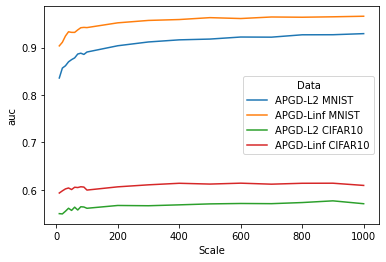

In [11]:
df_scale_s2_mnist_l2 = get_auc_df(
    'param_tuning_scale_s2_mnist_l2.csv', 
    'ReliabilityStage_tuneScale', 
    'MNIST', 
    'APGD-2', 
    '4.0'
)
df_scale_s2_mnist_linf = get_auc_df(
    'param_tuning_scale_s2_mnist_linf.csv', 
    'ReliabilityStage_tuneScale', 
    'MNIST', 
    'APGD-inf', 
    '0.22'
)
df_scale_s2_cifar10_l2 = get_auc_df(
    'param_tuning_scale_s2_cifar10_l2.csv',
    'ReliabilityStage_tuneScale',
    'CIFAR10',
    'APGD-2',
    '0.3',
)
df_scale_s2_cifar10_linf = get_auc_df(
    'param_tuning_scale_s2_cifar10_linf.csv',
    'ReliabilityStage_tuneScale',
    'CIFAR10',
    'APGD-inf',
    '0.01',
)
df_scale_s2_mnist_l2['Data'] = 'APGD-L2 MNIST'
df_scale_s2_mnist_linf['Data'] = 'APGD-Linf MNIST'
df_scale_s2_cifar10_l2['Data'] = 'APGD-L2 CIFAR10'
df_scale_s2_cifar10_linf['Data'] = 'APGD-Linf CIFAR10'

df3 = pd.concat(
    [df_scale_s2_mnist_l2, df_scale_s2_mnist_linf, df_scale_s2_cifar10_l2, df_scale_s2_cifar10_linf], 
    ignore_index=True)
df3 = df3[['Scale', 'Data', 'auc']]

sn.lineplot(data=df3, x='Scale', y='auc', hue='Data')

/home/lukec/workspace/baard_v4/results/exp643896/MNIST/DecidabilityStage_tuneScale/APGD-2/DecidabilityStage-500.0-MNIST-APGD-2-4.0.pt
19
/home/lukec/workspace/baard_v4/results/exp643896/MNIST/DecidabilityStage_tuneScale/APGD-inf/DecidabilityStage-50.0-MNIST-APGD-inf-0.22.pt
19
/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/DecidabilityStage_tuneScale/APGD-2/DecidabilityStage-20.0-CIFAR10-APGD-2-0.3.pt
19
/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/DecidabilityStage_tuneScale/APGD-inf/DecidabilityStage-700.0-CIFAR10-APGD-inf-0.01.pt
19


<AxesSubplot:xlabel='Scale', ylabel='auc'>

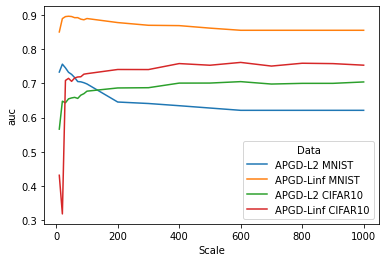

In [12]:
df_scale_s3_mnist_l2 = get_auc_df(
    'param_tuning_scale_s3_mnist_l2.csv', 
    'DecidabilityStage_tuneScale', 
    'MNIST', 
    'APGD-2', 
    '4.0'
)
df_scale_s3_mnist_linf = get_auc_df(
    'param_tuning_scale_s3_mnist_linf.csv', 
    'DecidabilityStage_tuneScale', 
    'MNIST', 
    'APGD-inf', 
    '0.22'
)
df_scale_s3_cifar10_l2 = get_auc_df(
    'param_tuning_scale_s3_cifar10_l2.csv',
    'DecidabilityStage_tuneScale',
    'CIFAR10',
    'APGD-2',
    '0.3',
)
df_scale_s3_cifar10_linf = get_auc_df(
    'param_tuning_scale_s3_cifar10_linf.csv',
    'DecidabilityStage_tuneScale',
    'CIFAR10',
    'APGD-inf',
    '0.01',
)
df_scale_s3_mnist_l2['Data'] = 'APGD-L2 MNIST'
df_scale_s3_mnist_linf['Data'] = 'APGD-Linf MNIST'
df_scale_s3_cifar10_l2['Data'] = 'APGD-L2 CIFAR10'
df_scale_s3_cifar10_linf['Data'] = 'APGD-Linf CIFAR10'

df4 = pd.concat(
    [df_scale_s3_mnist_l2, df_scale_s3_mnist_linf, df_scale_s3_cifar10_l2, df_scale_s3_cifar10_linf], 
    ignore_index=True)
df4 = df4[['Scale', 'Data', 'auc']]

sn.lineplot(data=df4, x='Scale', y='auc', hue='Data')

In [13]:
df1 = df1[df1['k'] <= 50]
df1 = df1[df1['k'] <= 150]
df3 = df3[df3['Scale'] <= 750]
df4 = df4[df4['Scale'] <= 150]


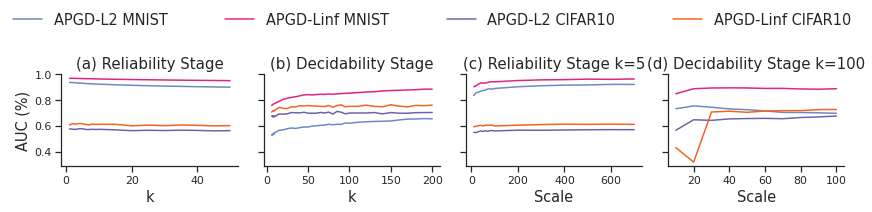

In [14]:
ibm_color_palette = [
    '#6D88C4',
    '#DC257F',
    '#6C63AC',
    '#F26322',
    '#FCB017',
]
sn.set_theme(
    style='white',
    palette=ibm_color_palette,
)
sn.set_style('ticks')

FONTSIZE = 14.5

plt.rcParams['font.size'] = FONTSIZE
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(12, 2.5))

sn.lineplot(data=df1, x='k', y='auc', hue='Data', ax=axs[0])
sn.lineplot(data=df2, x='k', y='auc', hue='Data', ax=axs[1])
sn.lineplot(data=df3, x='Scale', y='auc', hue='Data', ax=axs[2])
sn.lineplot(data=df4, x='Scale', y='auc', hue='Data', ax=axs[3])
sn.despine(bottom=False, left=False)

titles = [
    '(a) Reliability Stage',
    '(b) Decidability Stage',
    '(c) Reliability Stage k=5',
    '(d) Decidability Stage k=100',
]
y_labels = [
    'k', 'k', 'Scale', 'Scale'
]
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, loc='lower left',
           bbox_to_anchor=(0, 1, 1, 0), mode="expand", ncol=4, fontsize=FONTSIZE
           ).get_frame().set_linewidth(0)
axs[0].set_ylabel('AUC (%)', fontsize=FONTSIZE)
for i, title in enumerate(titles):
    axs[i].set_title(title, fontsize=FONTSIZE+0.5)
    axs[i].get_legend().remove()
    axs[i].set_xlabel(y_labels[i], fontsize=FONTSIZE)
plt.tight_layout()
plt.savefig('param_tuning.pdf', dpi=300, bbox_inches='tight')
